In [1]:
import pandas as pd

df = pd.read_csv("GOOGLE.csv")

In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2019,50.828499,52.616001,50.785500,52.292500,52.292500,30652000
1,03-01-2019,52.049999,52.848999,50.703499,50.803001,50.803001,36822000
2,04-01-2019,51.629501,53.542000,51.370899,53.535500,53.535500,41878000
3,07-01-2019,53.575001,53.700001,52.737999,53.419498,53.419498,39638000
4,08-01-2019,53.805500,54.228001,53.026501,53.813999,53.813999,35298000


In [3]:
df.set_index("Date", inplace=True)

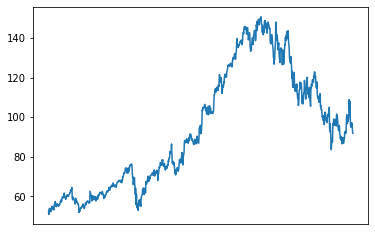

In [4]:
import matplotlib.pyplot as plt
plt.xticks([])
plt.plot(df.Close);

In [5]:
df["Tomorrow"]  = df["Close"].shift(-1)

df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,
02-01-2019,50.828499,52.616001,50.785500,52.292500,52.292500,30652000,50.803001
03-01-2019,52.049999,52.848999,50.703499,50.803001,50.803001,36822000,53.535500
04-01-2019,51.629501,53.542000,51.370899,53.535500,53.535500,41878000,53.419498
07-01-2019,53.575001,53.700001,52.737999,53.419498,53.419498,39638000,53.813999
08-01-2019,53.805500,54.228001,53.026501,53.813999,53.813999,35298000,53.733002
...,...,...,...,...,...,...,...
15-02-2023,94.739998,97.339996,94.360001,97.099998,97.099998,37029900,95.779999
16-02-2023,95.540001,97.879997,94.970001,95.779999,95.779999,35642100,94.589996
17-02-2023,95.070000,95.750000,93.449997,94.589996,94.589996,31074100,92.050003


In [6]:
df["Target"] = (df["Tomorrow"]> df["Close"]).astype(int)

df.head()

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
02-01-2019,50.828499,52.616001,50.785500,52.292500,52.292500,30652000,50.803001,0
03-01-2019,52.049999,52.848999,50.703499,50.803001,50.803001,36822000,53.535500,1
04-01-2019,51.629501,53.542000,51.370899,53.535500,53.535500,41878000,53.419498,0
07-01-2019,53.575001,53.700001,52.737999,53.419498,53.419498,39638000,53.813999,1
08-01-2019,53.805500,54.228001,53.026501,53.813999,53.813999,35298000,53.733002,0


In [7]:
df.shape

(1043, 8)

In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, min_samples_split=100, random_state=1)

train = df.iloc[:-100]
test  = df.iloc[-100:]

predictors = ["Adj Close", "Volume", "Open", "High", "Low"]

model.fit(train[predictors], train["Close"])

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


RandomForestRegressor(min_samples_split=100, random_state=1)

In [9]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

preds

array([102.96760314,  97.43617565, 103.86648418, 104.85518827,
       104.85518827, 104.85518827, 104.85518827, 104.85518827,
       104.35157103, 104.50904431,  98.27055204, 101.62362165,
       104.85518827, 104.85518827, 104.85518827, 104.85518827,
       104.69470874, 104.85518827, 104.85518827,  90.99127891,
        88.33252517,  89.6358076 ,  88.81388613,  88.81388613,
        88.33252517,  88.33252517,  88.33252517,  88.33252517,
        88.33252517,  88.33252517,  88.33252517,  90.12041879,
        89.31362827, 104.85518827, 104.69470874, 103.68081975,
       103.98226728,  94.39041963,  94.22628604, 103.34451067,
       101.88236584,  93.98833883,  88.81388613,  97.95432919,
       104.85518827, 104.85518827, 104.85518827, 103.28155573,
        89.95901912,  88.81388613,  88.33252517,  88.33252517,
        96.82229785,  88.81388613,  88.33252517,  88.33252517,
        88.33252517,  88.33252517,  88.33252517,  88.33252517,
        88.33252517,  88.33252517,  88.33252517,  88.33

In [10]:
preds = pd.Series(preds , index = test.index)

preds

Date
29-09-2022    102.967603
30-09-2022     97.436176
03-10-2022    103.866484
04-10-2022    104.855188
05-10-2022    104.855188
                 ...    
15-02-2023     91.421274
16-02-2023     90.114462
17-02-2023     88.497663
21-02-2023     88.332525
22-02-2023     88.332525
Length: 100, dtype: float64

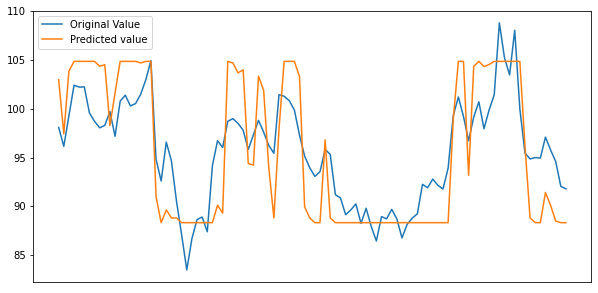

In [12]:
plt.figure(figsize=(10,5))
plt.plot(test["Close"], label = "Original Value")
plt.plot(preds , label = "Predicted value")
plt.xticks([])
plt.legend();